In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

calendar_df = pd.read_csv('C:/Users/prati/OneDrive/Desktop/calendar.csv')
listing_df = pd.read_csv('C:/Users/prati/OneDrive/Desktop/listings.csv')
reviews_df = pd.read_csv('C:/Users/prati/OneDrive/Desktop/reviews.csv')

In [10]:
listing_df['month']= pd.DatetimeIndex(listing_df['host_since']).month
listing_df['year']= pd.DatetimeIndex(listing_df['host_since']).year
listing_df['month_year']= pd.DatetimeIndex(listing_df['host_since']).to_period('M')

host_list= listing_df.groupby('host_name')['id'].count().sort_values(ascending=False).reset_index(name='total)')


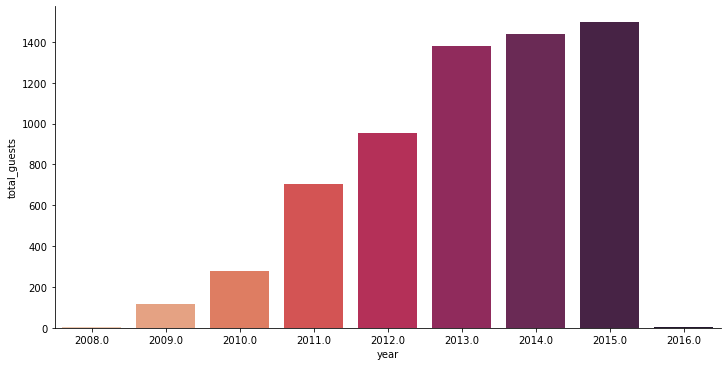

In [14]:
# with month how many guests have included

guests_time = listing_df.groupby(['year']).sum()['guests_included'].reset_index(name='total_guests')
g = sns.catplot(data = guests_time, x = 'year', y = 'total_guests', palette = 'rocket_r',kind = 'bar', dodge=False, aspect =2)
#g.set_xticklabels(rotation=90)

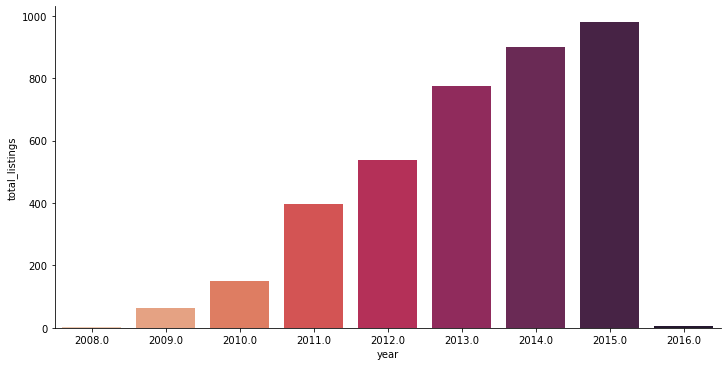

In [13]:
# with month or year what is the total listing variations
hosts_time = listing_df.groupby(['year']).count()['id'].reset_index(name='total_listings')
sns.catplot(data = hosts_time, x = 'year', y = 'total_listings', kind = 'bar',palette='rocket_r', dodge=False, aspect=2)
host_temp = hosts_time['total_listings']

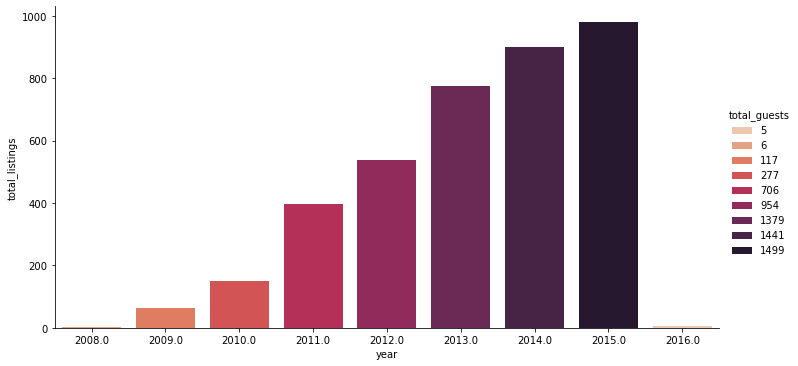

In [6]:
# see variation of both guest listing and host listing in one plot
guest_host_comb = pd.concat([guests_time,host_temp], axis = 1, ignore_index=True, sort = False)
guest_host_comb = guest_host_comb.set_axis(['year', 'total_guests','total_listings'], axis = 1, inplace = False)
sns.catplot(data = guest_host_comb, x = 'year', y = 'total_listings', hue = 'total_guests', kind = 'bar',palette = 'rocket_r', dodge = False, legend = 'full', legend_out = True, aspect =2)